In [4]:
import pandas as pd
import numpy as np
import pylab as pl
from statistics import mode
from sklearn.linear_model import LogisticRegression
import os
from sklearn.model_selection import train_test_split

In this EDA, we want to look into the different data captured and analyze what are some possible ways to identify whether that data was collected while a user was 

In [5]:
#in order to use the class generated data, need to link to dsmlp server
filepath = '/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped'
data = os.listdir(filepath)

FileNotFoundError: [Errno 2] No such file or directory: '/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped'

In [2]:
#internet browsing data collection with VPN
int1 = pd.read_csv('Week4-datafiles/arv020(1)-novideo-vpn-mac-20201101.csv')
int2 = pd.read_csv('Week4-datafiles/arv020(2)-novideo-vpn-mac-20201101.csv')
int3 = pd.read_csv('Week4-datafiles/arv020(3)-novideo-vpn-mac-20201101.csv')

In [3]:
#video streaming data collection with VPN
vid1 = pd.read_csv('Week4-datafiles/arv020(1)-youtube[480]-1x-vpn-mac-clean-20201101.csv')
vid2 = pd.read_csv('Week4-datafiles/arv020(2)-youtube[480]-1x-vpn-mac-clean-20201101.csv')
vid3 = pd.read_csv('Week4-datafiles/arv020(3)-youtube[480]-1x-vpn-mac-clean-20201101.csv')

In [4]:
int1.head()

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604972784,100.112.95.158,61917,100.113.29.201,8009,6,214,162,2,1,1604972784155;1604972784159;1604972784159;,162;162;52;,1;2;1;
1,1604972784,100.112.95.158,61934,100.112.254.17,8009,6,214,162,2,1,1604972784192;1604972784197;1604972784198;,162;162;52;,1;2;1;
2,1604972784,100.112.95.158,61916,100.112.223.112,8009,6,376,278,3,3,1604972784309;1604972784384;1604972784400;1604...,162;162;52;64;162;52;,1;1;2;2;2;1;
3,1604972784,100.112.95.158,63574,140.82.114.25,443,6,134,130,2,2,1604972784338;1604972784338;1604972784339;1604...,78;52;82;52;,2;1;1;2;
4,1604972784,100.112.95.158,50671,172.217.5.78,443,17,1667,692,3,3,1604972784409;1604972784409;1604972784415;1604...,1378;228;54;562;76;61;,1;1;2;2;2;1;


In the extended version of network_stats that was provided to us by viasat, we can see there are a couple extra rows of data. These rows include ["packet_times", "packet_sizes", "packet_dirs"]

In [5]:
int1[["Time", "packet_sizes", "packet_dirs"]]

,Time,packet_sizes,packet_dirs
0,1604972784,162;162;52;,1;2;1;
1,1604972784,162;162;52;,1;2;1;
2,1604972784,162;162;52;64;162;52;,1;1;2;2;2;1;
3,1604972784,78;52;82;52;,2;1;1;2;
4,1604972784,1378;228;54;562;76;61;,1;1;2;2;2;1;
...,...,...,...
3338,1604973434,40;40;,1;2;
3339,1604973434,162;162;52;,1;2;1;
3340,1604973434,40;40;,1;2;
3341,1604973434,40;40;,1;2;


Below we are data scraping the last two columns in order to analyze and look at the two types of network movements/flows (1-2,2-1)

## Modify Data

In [6]:
def modify_data(raw_data):
    #we are separating the column "packet sizes"
    new_pksize = []
    for i in raw_data["packet_sizes"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pksize.append(j)

    #we are separating the column "packet dir"
    new_pkdir = []
    for i in raw_data["packet_dirs"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pkdir.append(j)

    modified_data = pd.DataFrame({'packet_sizes': pd.to_numeric(new_pksize), 'packet_dir': pd.to_numeric(new_pkdir)})
    return modified_data

In [7]:
mod_int1= modify_data(int1)
mod_int2= modify_data(int2)
mod_int3= modify_data(int3)
mod_vid1= modify_data(vid1)
mod_vid2= modify_data(vid2)
mod_vid3= modify_data(vid3)

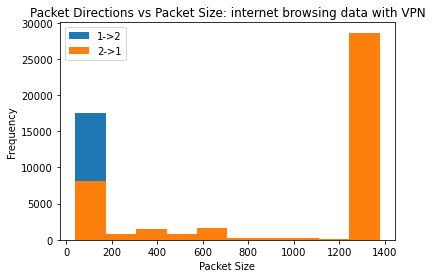

In [8]:
def pktdir_vs_pktsze_int(modified_data):
    modified_data[modified_data["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
    modified_data[modified_data["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
    pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
    pl.xlabel('Packet Size')
    pl.ylabel('Frequency')
    pl.legend(["1->2", "2->1"])
pktdir_vs_pktsze_int(modify_data(int1))

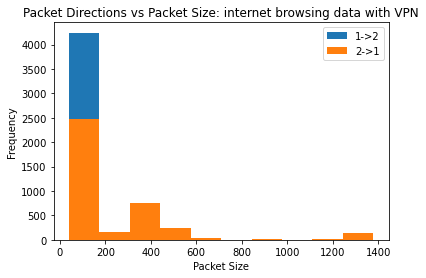

In [9]:
pktdir_vs_pktsze_int(modify_data(int2))

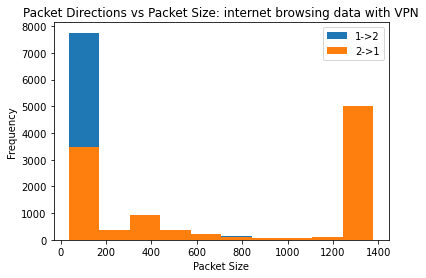

In [10]:
pktdir_vs_pktsze_int(modify_data(int3))

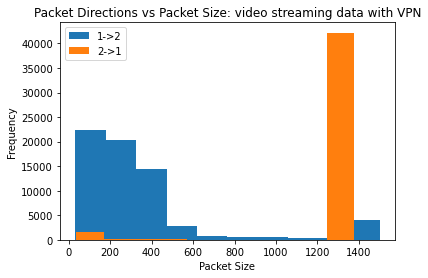

In [11]:
def pktdir_vs_pktsze_vid(modified_data):
    modified_data[modified_data["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
    modified_data[modified_data["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
    pl.title('Packet Directions vs Packet Size: video streaming data with VPN')
    pl.xlabel('Packet Size')
    pl.ylabel('Frequency')
    pl.legend(["1->2", "2->1"])
    
pktdir_vs_pktsze_vid(modify_data(vid1))

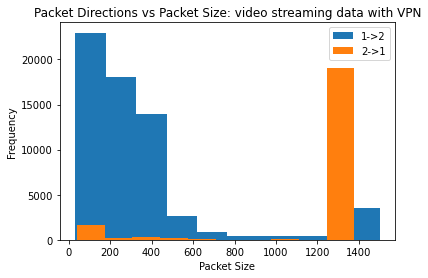

In [12]:
pktdir_vs_pktsze_vid(modify_data(vid2))


In [13]:
mod_int1[mod_int1["packet_sizes"] >= 1400]

,packet_sizes,packet_dir


In [14]:
mod_int2[mod_int2["packet_sizes"] >= 1400]

,packet_sizes,packet_dir


In [15]:
mod_int3[mod_int3["packet_sizes"] >= 1400]

,packet_sizes,packet_dir


In [16]:
mod_vid2[mod_vid2["packet_sizes"] >= 1400]

,packet_sizes,packet_dir
47,1461,1
48,1474,1
50,1463,1
51,1470,1
54,1481,1
...,...,...
85210,1495,1
85215,1476,1
85216,1473,1
85219,1496,1


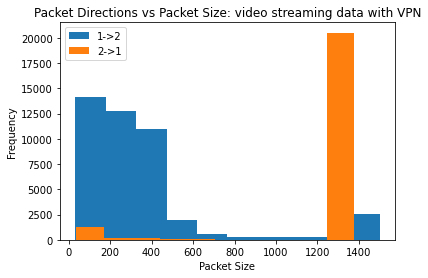

In [17]:
pktdir_vs_pktsze_vid(modify_data(vid3))

In [18]:
#Analysis of portion os packetsizes

In [19]:
#this function plots the first x proportion of packet_Sizes that appear in the data
def prop_pksize(tbl, percent):
    tbl["index"] = tbl.index
    up_to = tbl.size*percent
    tbl[:int(up_to)].plot.scatter("index", "packet_sizes")
    

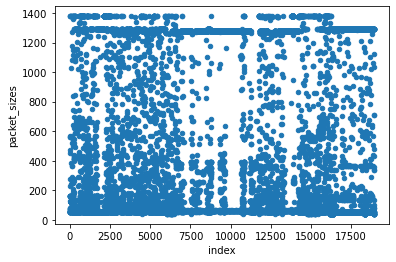

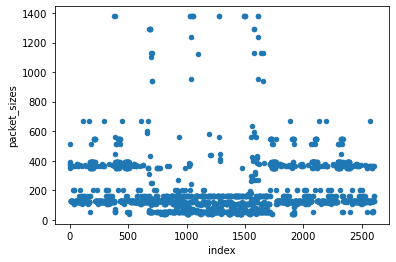

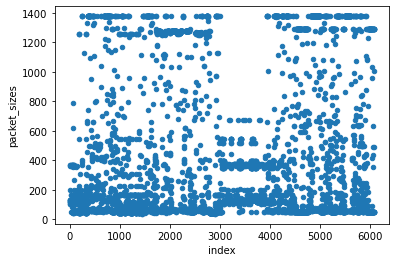

In [20]:
prop_pksize(mod_int1, .10)
prop_pksize(mod_int2, .10)
prop_pksize(mod_int3, .10)

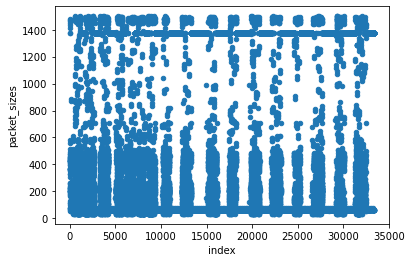

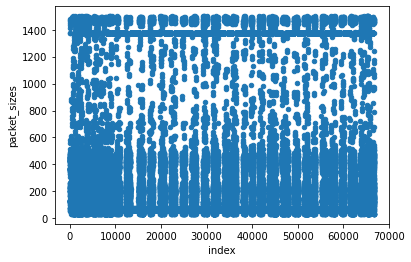

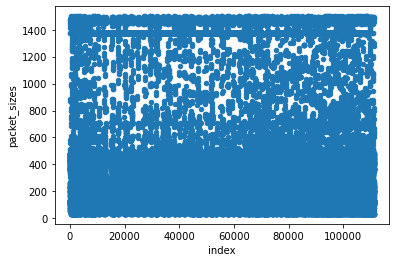

In [21]:
prop_pksize(mod_vid1, .10)
prop_pksize(mod_vid1, .20)
prop_pksize(mod_vid1, .50)

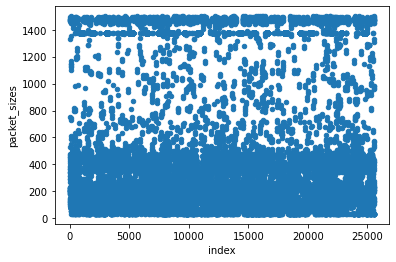

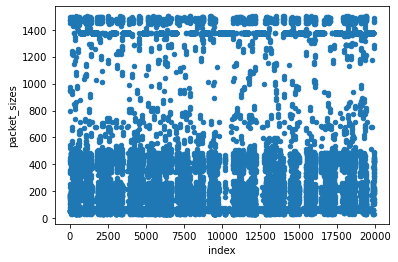

In [22]:
prop_pksize(mod_vid2, .10)
prop_pksize(mod_vid3, .10)

maybe we can make a feature that looks at the first 10% of packets coming through 
and look at last 10% of sizes coming through 

we can also look at first 10,000 packets 

This function is looking at the patterns of the first x points in the datset 

In [23]:
def num_pksize(tbl, num_points):
    tbl["index"] = tbl.index
    tbl[:num_points].plot.scatter("index", "packet_sizes")

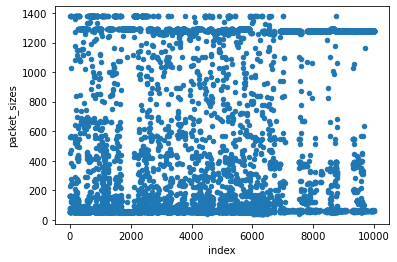

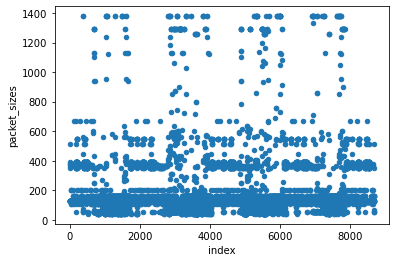

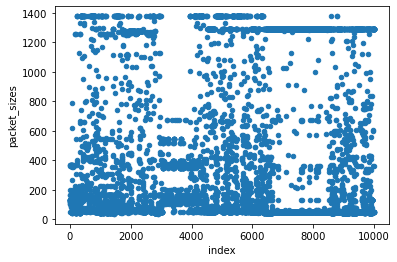

In [24]:
num_pksize(mod_int1, 10000)
num_pksize(mod_int2, 10000)
num_pksize(mod_int3, 10000)

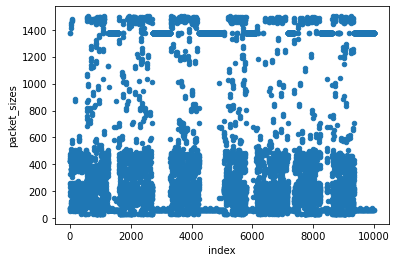

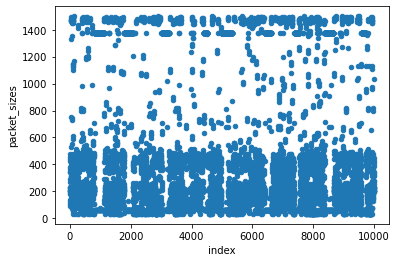

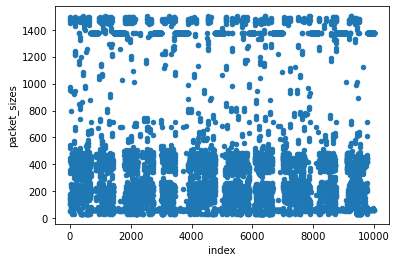

In [25]:
num_pksize(mod_vid1, 10000)
num_pksize(mod_vid2, 10000)
num_pksize(mod_vid3, 10000)

In [26]:
mod_int3

,packet_sizes,packet_dir,index
0,364,1,0
1,365,1,1
2,126,2,2
3,118,1,3
4,365,1,4
...,...,...,...
20283,108,2,20283
20284,52,1,20284
20285,108,1,20285
20286,108,2,20286


From here we are able to see that streaming data has a lot more of packet sizes that are of larger size. From there we are able to look at the means of the packet sizes for each scenario and be able to use that as a value of comparison for the features that are going to be put into the machine learning model/classifier.

Here we are continuing to look at perform EDA by looking at mean, STD, max, min values of the datasets

In [27]:
print("The mean of packet_sizes for a non streaming is: " + str(mod_int1.describe()["packet_sizes"][1]))
print("The mean of packet_sizes for a non streaming is: " + str(mod_int2.describe()["packet_sizes"][1]))
print("The mean of packet_sizes for a non streaming is: " + str(mod_int3.describe()["packet_sizes"][1]))

The mean of packet_sizes for a non streaming is: 703.462245609586
The mean of packet_sizes for a non streaming is: 199.79873417721518
The mean of packet_sizes for a non streaming is: 491.4431190851735


In [28]:
print("The std of packet_sizes for a non streaming is: " + str(mod_int1.describe()["packet_sizes"][2]))
print("The std of packet_sizes for a non streaming is: " + str(mod_int2.describe()["packet_sizes"][2]))
print("The std of packet_sizes for a non streaming is: " + str(mod_int3.describe()["packet_sizes"][2]))

The std of packet_sizes for a non streaming is: 580.1577078851716
The std of packet_sizes for a non streaming is: 231.57332575315036
The std of packet_sizes for a non streaming is: 540.8066797454417


In [29]:
print("The mean of packet_sizes for streaming is: " + str(mod_vid1.describe()["packet_sizes"][1]))
print("The mean of packet_sizes for streaming is: " + str(mod_vid2.describe()["packet_sizes"][1]))
print("The mean of packet_sizes for streaming is: " + str(mod_vid3.describe()["packet_sizes"][1]))

The mean of packet_sizes for streaming is: 730.2531978728756
The mean of packet_sizes for streaming is: 559.304565133223
The mean of packet_sizes for streaming is: 657.1649303206602


In [30]:
print("The std of packet_sizes for streaming is: " + str(mod_vid1.describe()["packet_sizes"][2]))
print("The std of packet_sizes for streaming is: " + str(mod_vid2.describe()["packet_sizes"][2]))
print("The std of packet_sizes for streaming is: " + str(mod_vid3.describe()["packet_sizes"][2]))

The std of packet_sizes for streaming is: 573.696271746613
The std of packet_sizes for streaming is: 528.4429074234238
The std of packet_sizes for streaming is: 555.9637478195345


In [31]:
mod_int1[["packet_sizes", "packet_dir"]]#.value_counts("packet_dir")

,packet_sizes,packet_dir
0,162,1
1,162,2
2,52,1
3,162,1
4,162,2
...,...,...
63087,40,2
63088,40,1
63089,40,2
63090,40,1


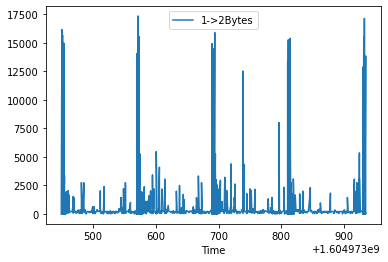

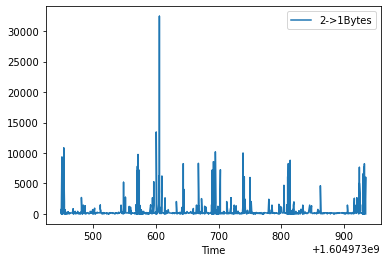

In [32]:
int2.plot("Time", "1->2Bytes")
int2.plot("Time", "2->1Bytes")

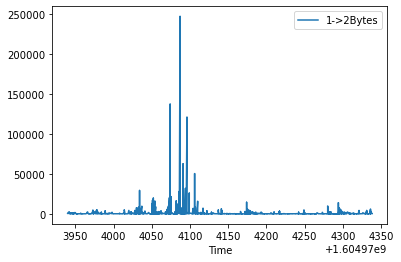

In [33]:
int3.plot("Time", "1->2Bytes")

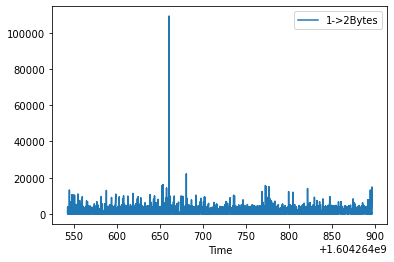

In [34]:
vid1.plot("Time", "1->2Bytes")

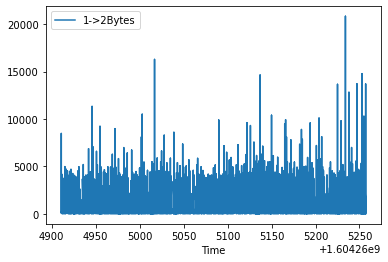

In [35]:
vid2.plot("Time", "1->2Bytes")

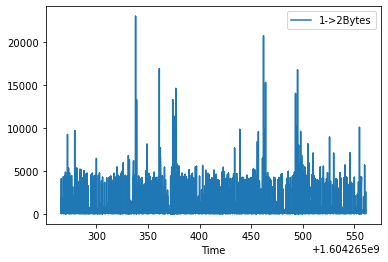

In [36]:
vid3.plot("Time", "1->2Bytes")

In [37]:
#lets look at frequency proportion of 1-> packets in [200-400 range]

In [38]:
prop_range200_400_dir1(mod_int1)

NameError: name 'prop_range200_400_dir1' is not defined

In [ ]:
prop_range200_400_dir1(mod_int2)

In [ ]:
prop_range200_400_dir1(mod_int3)

In [ ]:
prop_range200_400_dir1(mod_vid1)

In [ ]:
prop_range200_400_dir1(mod_vid2)

In [ ]:
prop_range200_400_dir1(mod_vid3)

## Feature Engineering

## Feature #1: proportion of packet siizes from 0-200 size 

In [ ]:
def prop_pksize_dir12(tbl):
    proportion = tbl[tbl["packet_sizes"] < 200]["packet_dir"].value_counts()[2]/ tbl[tbl["packet_sizes"] < 200]["packet_dir"].value_counts()[1]
    
    if proportion < .15:
        return "Streaming"
    else:
        return "Not Streaming"

## feature taken out

1. take into account the mean of the packet sizes for the data set (binary column)

0 = if mean of packet_sizes is < 500, not streaming(found from datasets of video streaming and internet browsing on vpn)

1 = if mean of packet_sizes is > 500, streaming

the idea here is that is a lot of packet sizes are larger than 500, it is video streaming. 


This function returns a new column (series) of binary (0/1) data 
**make sure parameter data is modified and split (one packet size per row)

In [ ]:
def binarymean_packetsizes(modified_data):
    output = (modified_data["packet_sizes"] > 400).replace({True: 1, False: 0}).value_counts().index[0]#.replace({1: "Streaming", 0: "Not Streaming"})
    if output == 1:
        return "Streaming"
    else:
        return "Not Streaming"

## Feature #2: Binary Min

When looking at the min/max of the packet_sizes for the activity, I noticed that the min value of packet_sizes was always 32 for video streaming. VS for internet browsing, it never got under 36. For that reason I want to see if this feature adds some accuracy to the model. 

0 = greater than 32 (not streaming)

1 = 32 or less (streaming)

In [ ]:
def binarymin_packetsizes(modified_data):
    output = (modified_data["packet_sizes"].min() <= 32)
    if output == 1:
        return "Streaming"
    else:
        return "Not Streaming"

## Feature 3: max packet_size 

In [ ]:
def binary_max_pksz(tbl):
    num_packets = tbl[tbl["packet_sizes"] >= 1400].size
    if num_packets > 0:
        return "Streaming"
    else:
        return "Not Streaming"

In [ ]:
binary_max_pksz(mod_int1)

In [ ]:
binary_max_pksz(mod_vid1)

## Feature 4: Looked at the proportion of upload packet sizes in range [200-400]

In [ ]:
def prop_range200_400_dir1(tbl):
    a = len(tbl[(tbl["packet_sizes"] > 200) & (tbl["packet_sizes"] < 600) & (tbl["packet_dir"] == 1)])
    b = len(tbl[tbl["packet_dir"] == 1])
    if (a/b) < .15:
        return "Not Streaming"
    else:
        return "Streaming"

## Classifier

In [ ]:
def classifier(raw_data):
    #should input features that take data as a parameter
    #this will create a list of 1/0 's
    feature1 = prop_pksize_dir12(modify_data(raw_data))
    feature2 = binarymin_packetsizes(modify_data(raw_data))
    feature3 = binary_max_pksz(modify_data(raw_data))
    feature4 = prop_range200_400_dir1(modify_data(raw_data))
    return mode([feature1, feature2, feature3, feature4])


In [ ]:
classifier(int3)

In [ ]:
classifier(vid3)

# Model

In [ ]:
X = classifier(raw_data)
y = 

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
clf.score(X,y)